# Microsoft Film Studio Analysis

In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os

## Tables for csv and tsv files

In [ ]:
# assign variables to the data gathered in a readable pandas format

In [2]:
movie_gross = pd.read_csv("dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz")

In [3]:
movie_info = pd.read_table("dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv.gz")

In [4]:
movies = pd.read_csv("dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz")

In [25]:
movies_budget = pd.read_csv("dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz")

In [6]:
movie_reviews = pd.read_table("dsc-phase-1-project-v2-4/zippedData/rt.reviews.tsv.gz", encoding='latin1')

# Putting this into something useful 

In order to get something useful for the business case we are dealing with, we are going to want to extract some of the data in these charts. It will be useful for stakeholders, management, and even future developers on the team. 

The first order of business is to give a general overview of top grossing films ands their budgets. This will give the audience the goal to shoot for over time. Microsoft isn't getting into film as a side hobby, I am confident they want to make money and win awards. In order to do that, the first step is understand the past and what has performed well. 

Secondly, I would like to chunk films based on budget. I would like to make 5 categories that show films with budgets low to high. I can then use this data to analyze top grossing films in each category and then even dive into what made those films successful given the budget. 

Finally, I will extract from these data relavant production compaies. I want to look at production companies that are in businesses which Microsoft would look to emulate. Preferably comparing to streaming services or companies backed by larger technology companies. 

In [7]:
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [30]:
# Loop through each row and sum the domestic_gross and worldwide_gross columns
total_gross = []
for i in range(len(movies_budget)):
    total_gross.append(movies_budget.loc[i, 'domestic_gross'] + movies_budget.loc[i, 'worldwide_gross'])
    
# Add the total_gross column to the dataframe
movies_budget['total_gross'] = total_gross


In [27]:
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [28]:
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [29]:
movies_budget['production_budget'] = movies_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

Okay lets make some charts!

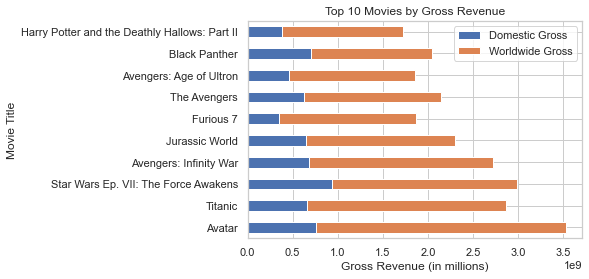

In [21]:
# sort the DataFrame by worldwide gross in descending order
movies_budget.sort_values(by='worldwide_gross', ascending=False, inplace=True)

# select the top 10 movies by worldwide gross
top_10 = movies_budget.head(10)

# create a horizontal bar chart of the domestic and worldwide gross for the top 10 movies
ax = top_10.plot.barh(x='movie', y=['domestic_gross', 'worldwide_gross'], stacked=True)

# set the chart title and axis labels
ax.set_title('Top 10 Movies by Gross Revenue')
ax.set_xlabel('Gross Revenue (in millions)')
ax.set_ylabel('Movie Title')

# add a legend to the chart
ax.legend(['Domestic Gross', 'Worldwide Gross'], loc='upper right')

# show the chart
plt.show()



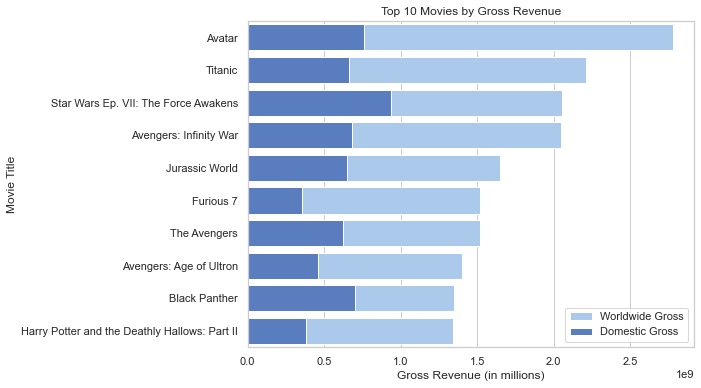

In [22]:
# sort the DataFrame by worldwide gross in descending order
movies_budget.sort_values(by='worldwide_gross', ascending=False, inplace=True)

# select the top 10 movies by worldwide gross
top_10 = movies_budget.head(10)
sns.set_theme(style="whitegrid")

# create a horizontal bar chart of the domestic and worldwide gross for the top 10 movies
sns.set_color_codes("pastel")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='worldwide_gross', y='movie', color='b', data=top_10, label='Worldwide Gross')
sns.set_color_codes("muted")
sns.barplot(x='domestic_gross', y='movie', color='b', data=top_10, label='Domestic Gross')

# set the chart title and axis labels
ax.set_title('Top 10 Movies by Gross Revenue')
ax.set_xlabel('Gross Revenue (in millions)')
ax.set_ylabel('Movie Title')

# add a legend to the chart
ax.legend(loc='lower right')

# save the chart as an image in the Images folder
plt.savefig("Images/top_10_movies1.png", dpi=300, bbox_inches="tight")

# show the chart
plt.show()


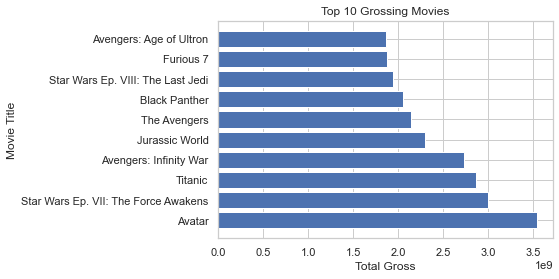

In [31]:
# sort the dataframe by total_gross in descending order
sorted_df = movies_budget.sort_values(by='total_gross', ascending=False)

# get the top 10 movies by total_gross
top10 = sorted_df.head(10)

# create a horizontal bar chart of the total gross of the top 10 movies
plt.barh(top10['movie'], top10['total_gross'])

# set the chart title and axis labels
plt.title('Top 10 Grossing Movies')
plt.xlabel('Total Gross')
plt.ylabel('Movie Title')

# save to Images
# show the chart
plt.show()


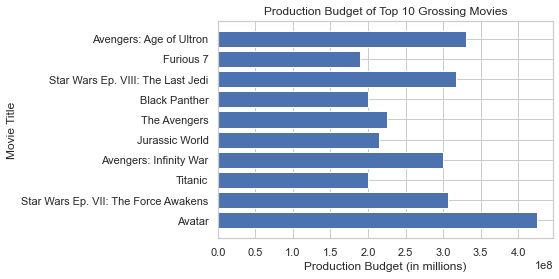

In [33]:
top10 = movies_budget.sort_values(by='total_gross', ascending=False).head(10)

# create a horizontal bar chart of the production budget of the top 10 grossing movies
plt.barh(top10['movie'], top10['production_budget'])
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Movie Title')
plt.title('Production Budget of Top 10 Grossing Movies')
plt.show()


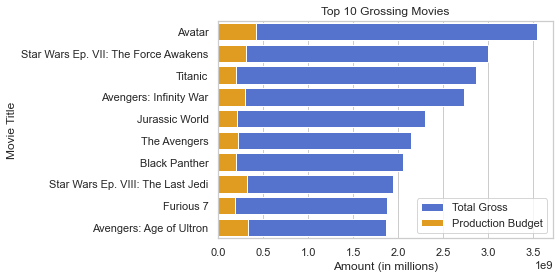

In [38]:
# sort the dataframe by total_gross in descending order
sorted_df = movies_budget.sort_values(by='total_gross', ascending=False)

# get the top 10 movies by total_gross
top10 = sorted_df.head(10)

# create a horizontal bar chart of the total gross and production budget of the top 10 movies
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()

sns.barplot(x='total_gross', y='movie', color='royalblue', data=top10, label='Total Gross')
sns.barplot(x='production_budget', y='movie', color='orange', data=top10, label='Production Budget')

# set the chart title and axis labels
ax.set_title('Top 10 Grossing Movies')
ax.set_xlabel('Amount (in millions)')
ax.set_ylabel('Movie Title')

# add a legend to the chart
ax.legend()

# save image 
plt.savefig('Images/top_10_.png', dpi=300, bbox_inches='tight')

# show the chart
plt.show()


In [88]:
movie_info['studio'].value_counts().head(25)

Universal Pictures                35
Paramount Pictures                27
20th Century Fox                  26
Sony Pictures Classics            22
Warner Bros. Pictures             21
Sony Pictures                     16
Columbia Pictures                 10
New Line Cinema                   10
IFC Films                          9
Miramax Films                      8
Warner Bros.                       8
Fox Searchlight Pictures           7
MGM                                7
Magnolia Pictures                  7
Roadside Attractions               6
The Weinstein Company              6
Lionsgate Films                    6
Focus Features                     6
Lions Gate Films                   6
Walt Disney Pictures               6
Summit Entertainment               5
Paramount Vantage                  5
Buena Vista Pictures               5
Fox Searchlight                    4
Buena Vista Distribution Compa     3
Name: studio, dtype: int64

In [97]:
# filter the dataframe to show only movies produced after 2010
movies_after_2010 = movies_budget[movies_budget['release_date'] >= '%%,%%,2015']

# sort the dataframe by total_gross in descending order
sorted_df = movies_after_2010.sort_values(by='total_gross', ascending=False)

# get the top 10 movies by total_gross
top10 = sorted_df.head(10)

# display the top 10 movies
print(top10[['movie', 'release_date', 'total_gross']])


                                   movie  release_date  total_gross
0                                 Avatar  Dec 18, 2009   3536852904
5   Star Wars Ep. VII: The Force Awakens  Dec 18, 2015   2989973445
42                               Titanic  Dec 19, 1997   2867572339
6                 Avengers: Infinity War  Apr 27, 2018   2726949682
33                        Jurassic World  Jun 12, 2015   2301125489
26                          The Avengers   May 4, 2012   2141215444
41                         Black Panther  Feb 16, 2018   2048317790
4      Star Wars Ep. VIII: The Last Jedi  Dec 15, 2017   1936903129
66                             Furious 7   Apr 3, 2015   1871729814
3                Avengers: Age of Ultron   May 1, 2015   1862019831
